In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [5]:
file_name_CARGO = "Контейнерные перевозки (просто сегменты).xlsx"
df = pd.read_excel(file_name_CARGO, skiprows=5, skipfooter=11, sheet_name="Сегменты", index_col=0)
df = df.drop(columns={"Рынок итого", "ЕТС итого", "Доля ЕТС"})
df = df.iloc[: , :-26]
df = df.fillna(df.mean())
df = df.T
df = df[['Общий итог по рынку', 'ЛПК', 'Химическая продукция', 'Машиностроение и металлообработка', 'Черная металлургия', 'Жидкие химикаты']]
df.to_csv('file.csv', encoding="UTF-8") 
df

дата,Общий итог по рынку,ЛПК,Химическая продукция,Машиностроение и металлообработка,Черная металлургия,Жидкие химикаты
2019-01-01 00:00:00,3375615.0,940054.0,358995.0,359975.0,324093.0,396797.0
2019-02-01 00:00:00,3452401.0,934602.0,373480.0,394487.0,293906.0,369341.0
2019-03-01 00:00:00,4005765.0,1119164.0,448113.0,424394.0,328754.0,423316.0
2019-04-01 00:00:00,3980470.0,1153440.0,421184.0,416330.0,349420.0,392853.0
2019-05-01 00:00:00,3875158.0,1018421.0,439188.0,438876.0,365331.0,406099.0
2019-06-01 00:00:00,3886804.0,971184.0,476841.0,460116.0,368586.0,407960.0
2019-07-01 00:00:00,4240869.0,1104764.0,498014.0,492318.0,403504.0,406910.0
2019-08-01 00:00:00,4151698.0,1089044.0,478482.0,480080.0,365178.0,425611.0
2019-09-01 00:00:00,3983855.0,1013004.0,457305.0,474989.0,352607.0,391574.0
2019-10-01 00:00:00,4237792.0,1081420.0,474592.0,495538.0,370667.0,434811.0


In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
standard_X = preprocessing.scale(X)
standard_Y = preprocessing.scale(y)
y

array([3375615., 3452401., 4005765., 3980470., 3875158., 3886804.,
       4240869., 4151698., 3983855., 4237792., 4123051., 4410267.,
       4003569., 3994586., 4462330., 4614893., 4634697., 4644981.,
       4996909., 4716552., 4942338., 5145319., 5000990., 5263737.,
       4624585., 4616333.])

In [7]:
standard_X

array([[-1.89282342, -1.92824714, -1.74212462, -1.26929788, -0.90439478],
       [-1.95719744, -1.78261021, -1.29036759, -1.6105821 , -1.84725656],
       [ 0.22200255, -1.03222559, -0.89888933, -1.21660215,  0.00628965],
       [ 0.62671348, -1.30297857, -1.00444591, -0.9829592 , -1.039835  ],
       [-0.96751179, -1.12196046, -0.70932206, -0.8030747 , -0.58495639],
       [-1.52525861, -0.74338487, -0.43129357, -0.76627475, -0.52104811],
       [ 0.05197578, -0.5305046 , -0.00977409, -0.37150341, -0.55710598],
       [-0.13363677, -0.72688572, -0.16996772, -0.80480447,  0.08510186],
       [-1.03147255, -0.93980621, -0.23660817, -0.94692804, -1.08375692],
       [-0.2236565 , -0.76599705,  0.03237524, -0.74274766,  0.40103748],
       [-0.9766153 , -0.60855634,  0.0027529 , -0.95979389,  0.71195934],
       [ 0.33475155,  0.49909875, -0.40892301, -0.40376979,  1.75938895],
       [-1.07349514,  0.15935297, -0.94081613, -0.54860671,  1.03520956],
       [-0.45006366, -0.18880828, -1.8

In [9]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned.astype(float) , rowvar = False)
    
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()

    return X_reduced

In [10]:
#Applying it to PCA function
mat_reduced = PCA(standard_X , 3)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2','PC3'])
#                             'PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

AAA = pd.DataFrame(standard_Y)
AAA.rename(columns={0: 'y'}, inplace=True)

#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df, AAA] , axis = 1)
principal_df

,PC1,PC2,PC3,y
0,3.516065,-0.159498,-0.389308,-2.027929
1,3.639278,-1.131708,-0.378094,-1.869900
2,1.468327,0.393255,1.041981,-0.731054
3,1.578425,-0.578196,1.410483,-0.783112
4,1.888981,-0.258413,-0.097425,-0.999848
5,1.787759,-0.264495,-0.734152,-0.975880
6,0.564985,-0.512105,0.378222,-0.247200
7,0.908259,0.168409,0.451307,-0.430718
8,1.786463,-0.856549,-0.176078,-0.776145
9,0.775828,0.366024,0.356763,-0.253533


<IPython.core.display.Javascript object>


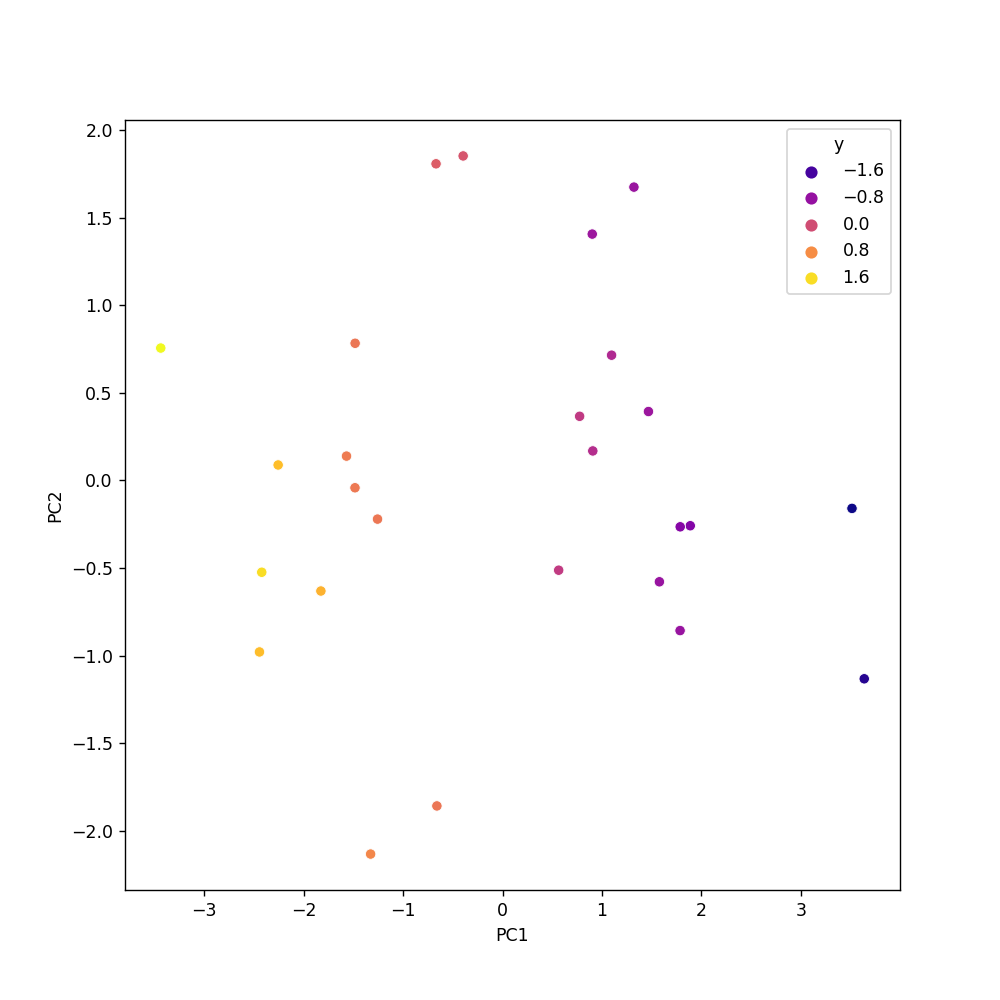

In [12]:
plt.figure(figsize = (8,8))
sb.scatterplot(data = principal_df , x = 'PC1', y = 'PC2' , hue = 'y' , palette = 'plasma')

<IPython.core.display.Javascript object>


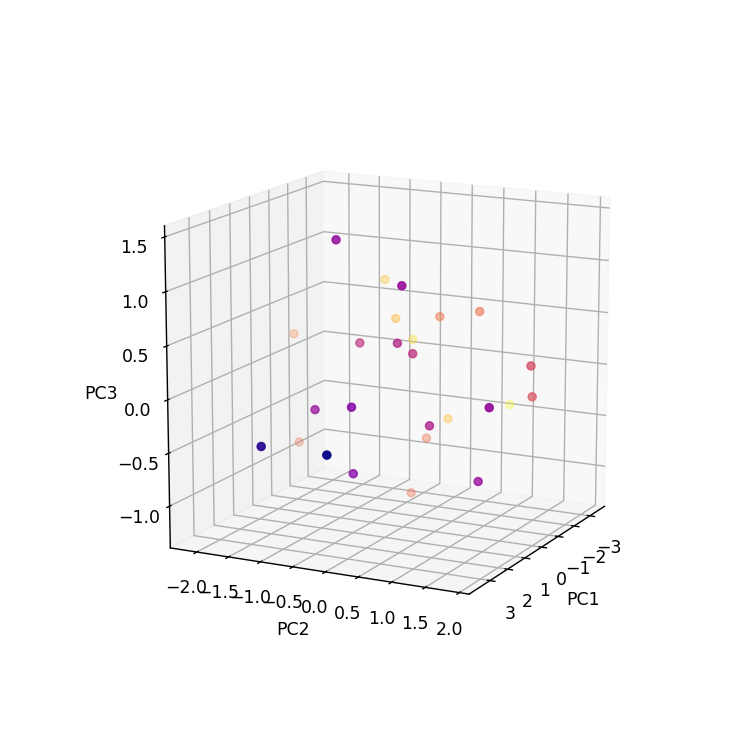

Text(0.5, 0, 'PC3')

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(principal_df['PC1'],principal_df['PC2'],principal_df['PC3'], c=principal_df['y'],cmap='plasma',label = 'Y')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

# plt.legend(handles=scatter.legend_elements()[0], labels='Y')
# plt.legend(loc='upper left', numpoints=10, ncol=10, fontsize=8, bbox_to_anchor=(0, 0))

In [14]:
# Scale data before applying PCA
scaling = StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
Scaled_data = scaling.transform(X)
 
# Set the n_components=3
principal = decomposition.PCA(n_components=3)
principal.fit(Scaled_data)
x = principal.transform(Scaled_data)
principal.components_
# Check the dimensions of data after PCA
# x.shape
principal.explained_variance_ratio_
# principal

array([0.68518583, 0.19964745, 0.07350748])